TP  2 : Introduction à la bibliothèque spaCy et à l'analyse linguistique de texte
====

1 - Introduction 
------

L'objectif de ce TP est de se familiariser avec la bilbiothèque spaCy et de comprendre les différentes analyses linguistiques possibles au niveau du mot et notamment le couplage texte - ontologie. 

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- spaCy: https://spacy.io/api
- NLTK: https://www.nltk.org/
- WordCloud : https://amueller.github.io/word_cloud/
- Counter : https://docs.python.org/3/library/collections.html
- Python 3: https://docs.python.org/3/
- Matplotilb: https://matplotlib.org/contents.html

In [1]:
# A exécuter si ces librairies ne sont pas sur vos machines

!pip install --user spacy
!pip install --user nltk
!pip install --user wordcloud
!python3 -m spacy download en_core_web_lg
!python3 -m spacy download fr_core_news_sm
!pip install --upgrade --user Pillow


ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
/home/22012235/venv/bin/python3: No module named spacy
/home/22012235/venv/bin/python3: No module named spacy
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [2]:
import spacy
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from wordcloud import WordCloud
from collections import Counter

2 - Génération de nuages de mots avec une motivation linguistique
-----

Importer le modèle de langue français.

In [3]:
# Pour impoter le moduèle : !python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
# si vous voulez utiliser un autre modèle voici quelques liens intéressants
# Tous les modèles : https://spacy.io/models
# Anglais : https://spacy.io/models/en
# Italien : https://spacy.io/models/it

Lire l'un des deux textes proposés dans ce TP: sport.text ou sante.text.

In [4]:
text_path1 = "sport.txt"
text_path2 = "sante.txt"

text1 = ""
with open(text_path1, encoding='utf-8') as f:
    text1 = f.read()
    
text2 = ""
with open(text_path2, encoding='utf-8') as f:
    text2 = f.read()

Transformer le texte en un objet "nlp" de la bibliothèque spaCy qui vous permet d'accéder facilement aux objets textuels.

In [5]:
doc = nlp(text1)
doc2 = nlp(text2)


Fonction qui retourne la fréquence des 50 mots les plus fréquents dans un document.

In [6]:
freq_list = Counter(token.text for token in doc if "\n" not in token.text)
freq_list.most_common(50)

[(',', 51),
 ('.', 40),
 ('de', 35),
 ('les', 19),
 ('le', 19),
 ('en', 14),
 ('a', 13),
 ('du', 12),
 ('la', 12),
 ('"', 12),
 ('des', 11),
 ('Bleus', 9),
 ('dans', 9),
 ("l'", 9),
 ('se', 9),
 ('et', 9),
 ('pour', 8),
 ('sur', 8),
 ("d'", 7),
 (':', 6),
 ('une', 6),
 ('monde', 6),
 ('Lucas', 6),
 ('France', 5),
 ("L'", 5),
 ('Hernandez', 5),
 ('équipe', 5),
 ('est', 5),
 ('que', 5),
 ('par', 5),
 ('plus', 5),
 ('un', 5),
 ('qui', 5),
 ('-', 4),
 ('Australie', 4),
 ('cette', 4),
 ('Coupe', 4),
 ('mois', 4),
 ('La', 4),
 ('après', 4),
 ('but', 4),
 ('blessure', 4),
 ('Didier', 4),
 ('Deschamps', 4),
 ('pas', 4),
 ('match', 3),
 ('contre', 3),
 ('victoire', 3),
 ('(', 3),
 (')', 3)]

[Q1] Programmer la suite d'instructions pour calculer les 40 mots les plus fréquents du fichier sante.txt.

In [7]:
# Insérer votre code ici
freq = Counter(token.text for token in doc2 if "\n" not in token.text)
freq.most_common(40)

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5)]

Fonction qui génère un nuage de mots à partir d'une liste de mots ordonnés par leur fréquence.

In [8]:
def generate_wordcloud(freq_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(freq_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

Génerer le nuage de mots

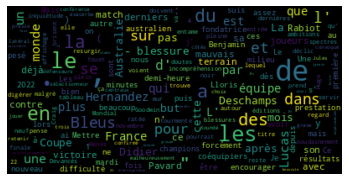

In [9]:
generate_wordcloud(freq_list)

[Q2] Générer le nuage de mots du fichier sante.txt.

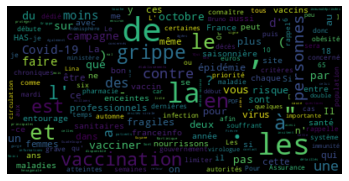

In [10]:
# Insérer votre code ici
generate_wordcloud(freq)

Fonction qui ne compte que les fréquences des mots qui ne sont pas de mots vides. Rappel, un mot vide est un mot qui n'a pas de sens dénotatif particulier. Ce sont les déterminants, les prépositions etc.

In [11]:
freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text)

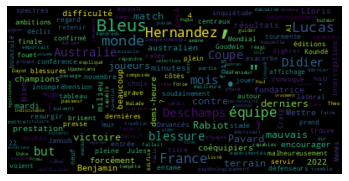

In [12]:
generate_wordcloud(freq_list)

[Q3] Générer le nuage de mots pour tous les mots sauf ceux qui sont un mot vide ou une ponctuation.

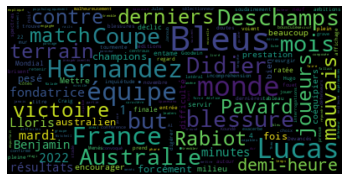

In [13]:
# insérer votre code ici
#ponct = ["'", ",", "!", ";", "?"]
#freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text and token.text not in ponct)
freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text and not token.is_punct)

generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes, i.e. du radical d'un mot.

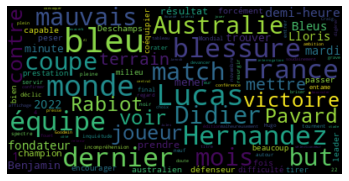

In [14]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes nominaux, i.e. seulement les noms.

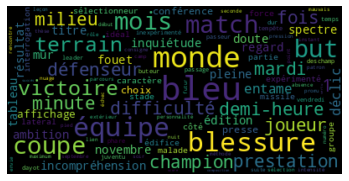

In [15]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

[Q4] Générer le nuage de lemmes adjectivaux pour le texte sante.txt.

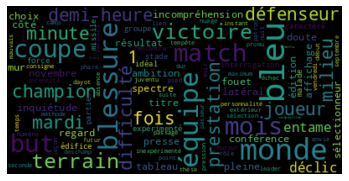

In [16]:
# Insérer votre code ici
freq_sant = Counter(token.lemma_ for token in doc2 if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)
            

Fonction qui génère un nuage d'entités nommées de type personne.

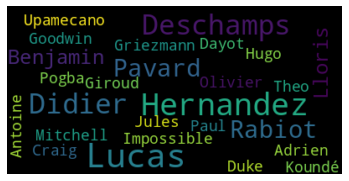

In [17]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct and token.ent_type_ == "PER")
generate_wordcloud(freq_list)

[Q5] Générer le nuage d'entités nommées de type Localisation pour le texte sante.txt.

In [18]:
nlp.get_pipe("ner").labels

('LOC', 'MISC', 'ORG', 'PER')

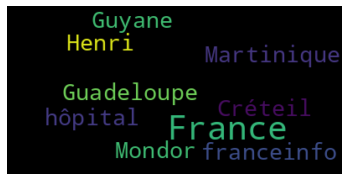

In [19]:
# insérer votre code ici
freq_list = Counter(token.text for token in doc2 if not token.is_stop and not token.is_punct and token.ent_type_ == "LOC")
generate_wordcloud(freq_list)

Fonction qui génère un nuage de mots qui sont compléments d'objet.

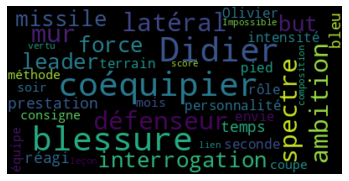

In [20]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj")
generate_wordcloud(freq_list)

[Q6] Générer le nuage des noms qui sont un sujet pour le texte sport.txt.

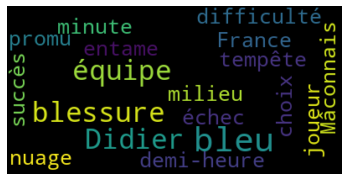

In [21]:
# insérer votre code ici
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

3 - Liste des informations linguistiques et leur visualisation
-----

Fonction qui montre toutes les informations linguistiques disponibles pour chacune des phrases d'un texte.

In [22]:
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), 
                            str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
                 for token in sent]))

0	France	France	PROPN	Gender=Fem|Number=Sing	0	ROOT		O
1	-	-	PROPN		1	ROOT		O
2	Australie	Australie	PROPN		2	ROOT		O
3	:	:	PUNCT		2	punct		O
4	une	un	DET	Definite=Ind|Gender=Fem|Number=Sing|PronType=Art	6	det		O
5	première	premier	ADJ	Gender=Fem|NumType=Ord|Number=Sing	6	amod		O
6	demi-heure	demi-heure	NOUN	Gender=Fem|Number=Sing	2	nmod		O
7	fondatrice	fondateur	ADJ	Number=Sing	6	amod		O
8	pour	pour	ADP		10	case		O
9	les	le	DET	Definite=Def|Number=Plur|PronType=Art	10	det		O
10	Bleus	bleu	NOUN	Gender=Masc|Number=Sing	6	nmod	ORG	B
11	dans	dans	ADP		13	case		O
12	cette	ce	DET	Gender=Fem|Number=Sing|PronType=Dem	13	det		O
13	Coupe	coupe	NOUN	Gender=Fem|Number=Sing	6	nmod	MISC	B
14	du	de	ADP	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	15	case	MISC	I
15	monde	monde	NOUN	Gender=Masc|Number=Sing	13	nmod	MISC	I
16	2022	2022	NUM	NumType=Card	6	nmod	MISC	I
17	?	?	PUNCT		2	punct		O
18	

	

	SPACE		17	dep		O
19	L'	le	DET	Definite=Def|Number=Sing|PronType=Art	20	det		O
20	entame	entame	NOUN	G

Visualisation des entités nommées dans un texte.

In [23]:
from spacy import displacy
displacy.render(doc, style="ent")

Visualisation de l'abre de dépendance d'une phrase donnée.

In [24]:
displacy.render(list(doc.sents)[4], style="dep")

[Q7] Visualiser l'abre de dépendance de la dixième phrase dans un format compact.

In [25]:
# insérer votre code ici
displacy.render(list(doc.sents)[9], style="dep")

4 - Utilisation d'une image pour la réalisation d'un nuage de mots
-----

In [26]:
from PIL import Image
import numpy as np

Convertir l'image en une matrice de valeurs 0 ou 255, i.e. un masque.

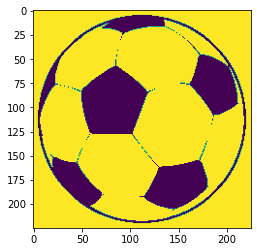

In [27]:
mask = (np.array(Image.open("football.png").convert('L')) > 0) * 255
plt.imshow(mask)

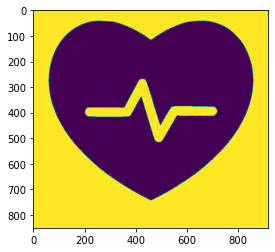

In [28]:
mask2 = (np.array(Image.open("heart.png").convert('L')) > 0) * 255
plt.imshow(mask2)

Génerer le nuage de mots avec des masques. 

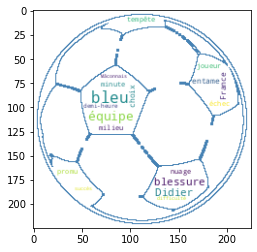

In [29]:
wc = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

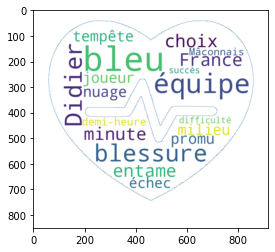

In [30]:
wc = WordCloud(background_color="white", max_words=100, mask=mask2, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

5 - Extraire des unités polylexicales
-----

In [31]:
import nltk
from nltk.collocations import *

Trouver les bigrams avec l'information mutuelle la plus forte.

In [32]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.pmi, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo'),
 ('Olivier', 'Giroud')]

[Q8] Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.

In [33]:
# insérer votre code ici
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.dice, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Didier', 'Deschamps'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo')]

Trouver les 10 trigrams avec l'information mutuelle la plus élevée.

In [34]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[("N'", 'Golo', 'Kanté'),
 ('Promu', 'titulaire', 'indiscutable'),
 ('convoqué', 'trois', 'défenseurs'),
 ('déroulé', 'comme', 'rarement'),
 ('naturel', 'chez', 'moi'),
 ('ont', 'déroulé', 'comme'),
 ('paradoxalement', 'semblé', 'débloquer'),
 ('prendre', 'quelques', 'secondes'),
 ('sans', 'même', 'regarder'),
 ('tempête', 'emportait', 'tout')]

[Q9] Trouver les 10 trigrams avec le coefficient de DICE le plus élevé. Que se passe-t-il? Quelles sont les alternatives?

In [35]:
# insérer votre code ici
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.raw_freq, 10)

# Il n'existe de coefficient DICE pour trigram
# Les alternatives sont : chi_sq, jaccard,likelihood_ratio, mi_like, poisson_stirling, raw_freq, student_t

[('Coupe', 'du', 'monde'),
 ('blessure', 'de', 'Lucas'),
 (',', 'les', 'Bleus'),
 ('de', 'Lucas', 'Hernandez'),
 ('sur', 'le', 'terrain'),
 ('équipe', 'de', 'France'),
 ('"', ',', 'a'),
 ('"', 'La', 'blessure'),
 ('-', '1', ')'),
 ('Didier', 'Deschamps', 'en')]

Intégrer les 30 meilleurs bigrams suivant le coefficient de DICE dans un texte en les connectant par un underscore. Et générer le nuage de mot correspondant. 

In [36]:
from nltk.tokenize import MWETokenizer

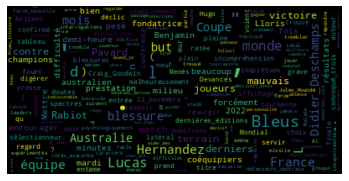

In [37]:
finder = BigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(bigram_measures.dice, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop and "\n" not in token.text]))

[Q10] Intégrer les 30 meilleurs trigrams suivant l'information mutuelle dans un texte en les connectant par un underscore. Et générer un nuage de mot qui ne contient que des trigrams.

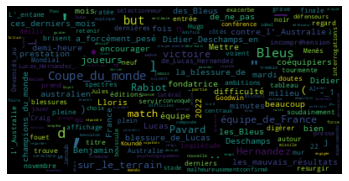

In [38]:
# insérer votre code ici
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(trigram_measures.raw_freq, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop and "\n" not in token.text]))

6 - Enrichissement des textes par liaison ontologique
-----

In [39]:
from nltk.corpus import wordnet as wn
#import nltk
#nltk.download('omw-1.4')

L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Par exemple, dans la phrase, "le chanteur danse la java avec des choristes", l'algorithme de Lesk permet de désambiguiser le sens de java, i.e. java dans les sens de danse et non java dans le sens de café ou de langage de programmation. L'algorithme de Lesk retourne le sens correspondant à un mot dans un contexte donné.

In [40]:
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    
    """Return a synset for an ambiguous word in a context.
    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    This function is an implementation of the original Lesk algorithm (1986) [1].
    Usage example::
        >>> lesk(['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.'], 'bank', 'n')
        Synset('savings_bank.n.02')
    [1] Lesk, Michael. "Automatic sense disambiguation using machine
    readable dictionaries: how to tell a pine cone from an ice cream
    cone." Proceedings of the 5th Annual International Conference on
    Systems Documentation. ACM, 1986.
    https://dl.acm.org/citation.cfm?id=318728
    """

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

Nous travaillerons avec un texte en anglais pour avoir toutes les fonctions nécessaires d'accès à wordnet. Si vous voulez tester d'autres langues, l'italien et l'espagnol fonctionnent.

In [41]:
nlp = spacy.load("en_core_web_lg")

text_path3 = "sport-en.txt"

text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()
    
doc = nlp(text3)

Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet. Attention, seuls les noms, les verbes, les adjectifs et les adverbes se trouvent dans wordnet. Dans cet exemple, le contexte donné est celui de la phrase dans lequel se trouve le mot.

In [44]:
pos_to_wn = {'NOUN': wn.NOUN, 'VERB': wn.VERB, 'ADJ': wn.ADJ, 'ADV': wn.ADV, 'PROPN': wn.NOUN}

sent_level = []

for sent in doc.sents:
    context = [token.text for token in sent]
    for token in sent:
        if token.pos_ in pos_to_wn:
            # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
            sent_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        else:
            sent_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

[Q11] Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet en utilisant l'ensemble du document pour désambiguiser le sens? Quels sont vos commentaires par rapport à une désambiguisation basée sur la phrase uniquement.

In [45]:
# insérer votre code ici
context = [token.text for token in doc if not token.is_punct]
sens = []
for token in doc:
    res = lesk(context, token.lemma_, pos=pos_to_wn.get(token.pos_, 'NOUN'))
    sens.append((token.text, res))
sens

#La désambiguïsation basée sur la phrase uniquement peut être insuffisante pour résoudre les ambiguïtés de sens,
#car elle ne prend pas en compte les informations contextuelles plus larges telles que la connaissance du monde et les relations sémantiques entre les mots  

[('The', None),
 ('US', Synset('uracil.n.01')),
 ('Men', Synset('man.n.08')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.09')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('topographic_point.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('worldly_concern.n.01')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('smasher.n.02')),
 ('stage', Synset('stage.n.03')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.01')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('barn.n.02')),
 ('decider', 

7 - PROJET : Réécrire un texte avec des informations retirées de wordnet 
-----

[PROJET Q1] Réécrire un texte en interchangeant un mot par son antonyme. Par exemple, "petit" devient "grand" et "laideur" devient "beauté". Vous pourrez utiliser la fonction highligth_word() pour mettre en avant les mots qui ont été changés.

In [71]:
def highlight_word(word):
    # Il faut aussi vérifier si word est ""
    return "\x1b[43m" + (word if word else "") + "\x1b[m"

In [86]:

for word in doc:
    synsets = wn.synsets(word.text)
    if synsets and len(synsets) > 1:
        syn = synsets[1]  # Utilisez le second synset de la liste
        antonyms = syn.lemmas()[0].antonyms() if syn.lemmas() else []
        antonyme = antonyms[0].name() if antonyms else None
        print(f"{highlight_word(antonyme)}  {word.text}")
    else:
        print(f"{word.text}")




The
  US
woman  Men
’s
  National
  Team
(
USMNT
)
  was
  made
to
  work
soft  hard
for
its
  place
  in
the
  World
  Cup
  knockout
  stage
,
  earning
  a
  tough
  1
-
  0
losings  win
  over
Iran
  in
  a
  nerve
-
  racking
  Group
  B
decider
  at
  Qatar
2022
.



  Christian
Pulisic
’s
  first
-
  half
  goal
  was
  all
that
  separated
the
  two
  sides
  as
the
USMNT
  reached
the
  round
of
  16
for
the
  first
  time
since
2014
.



The
  pressure
  was
certainly
off  on
for
Gregg
Berhalter
’s
  side
  in
  Qatar
  after
the
  national
  team
’s
success  failure
to
disqualify  qualify
for
the
2018
  World
  Cup
,
but
the
  US
  got
the
  job
  done
with
  three
  gritty
  group
  performances
.



It
certainly
  was
n’t
  pretty
  at
  times
,
  in
  particular
  in
the
  closing
  stages
against
Iran
,
but
recede  progressing
  through
the
  group
  stage
  was
the
maximum  minimum
  expectation
for
this
stifle  exciting
  young
  team
.



here  There
  will
  be
  som

[PROJET Q2] Réécrire un texte en interchangeant tous les mots par leur hyponyme le plus profond dans wordnet pour un contexte donné. Ainsi, pour chaque mot vous devrez (1) trouver son synset, (2) descendre dans l'arbre en choisissant le prochain synset selon la relation d'hyperonimie, (3) parmi les hyponymes possibles choisir celui qui est le plus probable selon l'algorithme de Lesk. Par exemple, "groupe" devient "sous-groupe", "chat" devient "siamois".

In [160]:
for word in doc:
    synsets = wn.synsets(word.text)
    if synsets:
        hyponymes = synsets[0].hyponyms()
        if hyponymes:
            hyponyme = hyponymes[0].name().split('.')[0]
            print(f'{highlight_word(hyponyme)} {word.text}')
        else:
            print(f'{word.text}')
    else:
        print(f'{word.text}')


The
US
complement Men
’s
citizen National
a-team Team
(
USMNT
)
was
overdo made
to
action work
hard
for
its
birthplace place
in
the
closed_universe World
beaker Cup
knockout
anal_stage stage
,
eke_out earning
a
tough
monad 1
-
0
first-place_finish win
maiden_over over
Iran
in
a
cranial_nerve nerve
-
racking
actinoid Group
bacillus_anthracis B
decider
at
Qatar
2022
.



adventist Christian
Pulisic
’s
former first
-
fifty_percent half
aim goal
was
all
that
separated
the
couple two
bedside sides
as
the
USMNT
access reached
the
round
of
16
for
the
former first
time
since
2014
.



The
blood_pressure pressure
was
certainly
on
for
Gregg
Berhalter
’s
bedside side
in
Qatar
after
the
citizen national
a-team team
’s
backsliding failure
to
qualify
for
the
2018
closed_universe World
beaker Cup
,
but
the
US
accept got
the
accountancy job
overdo done
with
three
gritty
actinoid group
act performances
.



It
certainly
was
n’t
pretty
at
modern_times times
,
in
particular
in
the
closing
anal_stage stag

[PROJET Q3] Réécrire un texte écrit en anglais en interchangeant tous les mots par leurs correspondants en français, en italien ou en espagnol. Cela revient à avoir un traducteur mot à mot. Par exemple, "group" devient "groupe", "cat" devient "chat".

In [167]:
wn.langs()

['eng']

In [178]:
# Traduction des mots en français
for word in doc:
    synsets = wn.synsets(word.text)
    if synsets and len(synsets) > 1:
        synset = synsets[1]
        french_lemmas = synset.lemma_names('fra')  
        if french_lemmas:
            french_lemma = french_lemmas[0] 
            print(f"{highlight_word(french_lemma)} {word.text}")
        else:
            print(f"{word.text}")
    else:
        print(f"{word.text}")


The
uracile US
homme Men
’s
national National
attelage Team
(
USMNT
)
être was
rendre made
to
job work
difficile hard
for
its
endroit place
IN in
the
Terre World
tasse Cup
Ko knockout
degré stage
,
gagner earning
rétinol a
bandit tough
10 1
-
0 0
gagner win
fini over
Iran
IN in
rétinol a
cœur nerve
-
racking
groupe Group
B
decider
at at
Katar Qatar
2022
.



Christian Christian
Pulisic
’s
premier first
-
mi-temps half
but goal
être was
tout all
that
diviser separated
the
two
côté sides
Samoa_américaines as
the
USMNT
aboutir reached
the
cycle round
of
seize 16
for
the
premier first
temps time
since
2014
.



The
oppression pressure
être was
certainly
on
for
Gregg
Berhalter
’s
côté side
IN in
Katar Qatar
après after
the
national national
attelage team
’s
failure
to
définir qualify
for
the
2018
Terre World
tasse Cup
,
but
the
uracile US
devenir got
the
travail job
accomplir done
with
three
jeu gritty
groupe group
performance performances
.



It
certainly
être was
n’t
beau pretty
at at
fo

In [179]:
# Traduction des mots en italie
for word in doc:
    synsets = wn.synsets(word.text)
    if synsets and len(synsets) > 1:
        synset = synsets[1]
        french_lemmas = synset.lemma_names('ita')  
        if french_lemmas:
            french_lemma = french_lemmas[0] 
            print(f"{highlight_word(french_lemma)} {word.text}")
        else:
            print(f"{word.text}")
    else:
        print(f"{word.text}")


The
US
maschio Men
’s
nazionale National
attacco Team
(
USMNT
)
avere was
essere made
to
lavoro work
duro hard
for
its
luogo place
indio in
the
mondo World
tazza Cup
ko knockout
fase stage
,
guadagnare earning
a
giovinastro tough
1 1
-
zero 0
vincita win
finito over
Iran
indio in
a
animo nerve
-
racking
radicale Group
B
decider
lat at
Qatar Qatar
2022
.



cristiano Christian
Pulisic
’s
primo first
-
tempo half
destinazione goal
avere was
all
that
disgiungere separated
the
two
parte sides
as
the
USMNT
raggiungere reached
the
ciclo round
of
16 16
for
the
primo first
periodo time
since
2014
.



The
pressione pressure
avere was
certainly
on
for
Gregg
Berhalter
’s
parte side
indio in
Qatar Qatar
dopo after
the
nazionale national
attacco team
’s
fallimento failure
to
qualify
for
the
2018
mondo World
tazza Cup
,
but
the
US
divenire got
the
job
eseguire done
with
three
gritty
radicale group
esecuzione performances
.



It
certainly
avere was
n’t
pretty
lat at
moltiplicazione times
,
indio in

In [180]:
# Traduction des mots en espagnol
for word in doc:
    synsets = wn.synsets(word.text)
    if synsets and len(synsets) > 1:
        synset = synsets[1]
        french_lemmas = synset.lemma_names('spa')  
        if french_lemmas:
            french_lemma = french_lemmas[0] 
            print(f"{highlight_word(french_lemma)} {word.text}")
        else:
            print(f"{word.text}")
    else:
        print(f"{word.text}")


The
uracilo US
hombre Men
’s
nacional National
Team
(
USMNT
)
ser was
convertir made
to
obra work
duro hard
for
its
lugar place
indio in
the
World
taza Cup
nocaut knockout
etapa stage
,
ganar earning
a
tough
1
-
0
ganancia win
completo over
Iran
indio in
a
coraje nerve
-
atormentar racking
radical Group
B
decider
at
Qatar
2022
.



cristiano Christian
Pulisic
’s
primero first
-
mitad half
destino goal
ser was
all
that
separar separated
the
two
ala sides
Samoa_Americana as
the
USMNT
lograr reached
the
ciclo round
of
16
for
the
primero first
tiempo time
since
2014
.



The
presión pressure
ser was
certainly
on
for
Gregg
Berhalter
’s
ala side
indio in
Qatar
after
the
nacional national
team
’s
fracaso failure
to
capacitar qualify
for
the
2018
World
taza Cup
,
but
the
uracilo US
got
the
cometido job
ejecutar done
with
three
enérgico gritty
radical group
actuación performances
.



It
certainly
ser was
n’t
buen pretty
at
multiplicación times
,
indio in
elemento particular
indio in
the
cierre

[PROJET Q4] Réécrire un texte en interchangeant tous les mots par leurs définitions. Cela revient à produire la contrainte Littérature Définitionnelle (https://www.oulipo.net/fr/contraintes/litterature-definitionnelle) du groupe de recherche en écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

In [185]:
for word in doc:
    synsets = wn.synsets(word.text)
    if synsets and len(synsets) > 1:
        synset = synsets[0]
        definition = synset.definition()
        
        print(f"{highlight_word(definition)} {word.text}")
    else:
        print(f"{word.text}")

The
North American republic containing 50 states - 48 conterminous states in North America plus Alaska in northwest North America and the Hawaiian Islands in the Pacific Ocean; achieved independence in 1776 US
the force of workers available Men
’s
a person who owes allegiance to that nation National
a cooperative unit (especially in sports) Team
(
USMNT
)
a state in northwestern United States on the Pacific was
engage in made
to
activity directed toward making or doing something work
not easy; requiring great physical or mental effort to accomplish or comprehend or endure hard
for
its
a point located with respect to surface features of some region place
a unit of length equal to one twelfth of a foot in
the
everything that exists anywhere World
a small open container usually used for drinking; usually has a handle Cup
a very attractive or seductive looking woman knockout
any distinct time period in a sequence of events stage
,
earn on some commercial or business transaction; earn as sa

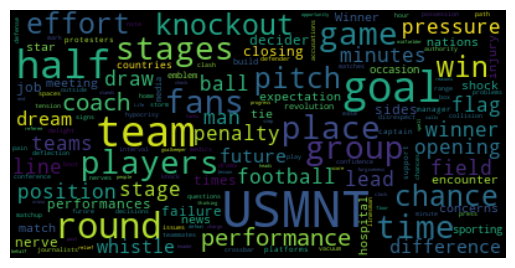

In [47]:
# insérez votre code ici

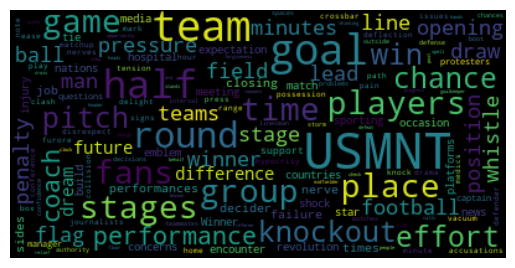

In [48]:
# insérez votre code ici